In [1]:

!pip install opendatasets
!pip install pandas


In [2]:
import opendatasets as od
import pandas as pd
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/Users/suchitsharma/Downloads/Lung Disease Dataset/train'
valid_path = '/Users/suchitsharma/Downloads/Lung Disease Dataset/test'

In [4]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
ress = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in ress.layers:
  layer.trainable = False

2023-07-01 23:51:12.349587: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-01 23:51:12.349605: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-07-01 23:51:12.349611: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-07-01 23:51:12.349670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-01 23:51:12.349682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


234545216/234545216 [==============================] - 36s 0us/step


In [5]:
 # useful for getting number of classes
folders = glob('/Users/suchitsharma/Downloads/Lung Disease Dataset/train/*')

x = Flatten()(ress.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=ress.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/suchitsharma/Downloads/Lung Disease Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/Users/suchitsharma/Downloads/Lung Disease Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 6054 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


In [7]:
len(folders)

5

In [8]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [9]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),callbacks=[early]
)


/var/folders/1r/d9gtx_q511v7f19mk0_z468r0000gn/T/ipykernel_49340/2699722215.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20


2023-07-01 23:51:55.450150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


190/190 [==============================] - ETA: 0s - loss: 3.6331 - accuracy: 0.7313

2023-07-01 23:54:18.583905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


190/190 [==============================] - 195s 998ms/step - loss: 3.6331 - accuracy: 0.7313 - val_loss: 4.4164 - val_accuracy: 0.7600
Epoch 2/20
190/190 [==============================] - 237s 1s/step - loss: 3.1722 - accuracy: 0.7988 - val_loss: 3.4089 - val_accuracy: 0.8064
Epoch 3/20
190/190 [==============================] - 231s 1s/step - loss: 2.1621 - accuracy: 0.8330 - val_loss: 3.0133 - val_accuracy: 0.8202
Epoch 4/20
190/190 [==============================] - 252s 1s/step - loss: 2.2917 - accuracy: 0.8409 - val_loss: 3.1602 - val_accuracy: 0.8109
Epoch 5/20
190/190 [==============================] - 228s 1s/step - loss: 2.2695 - accuracy: 0.8561 - val_loss: 3.4970 - val_accuracy: 0.8173
Epoch 6/20
190/190 [==============================] - 225s 1s/step - loss: 2.1964 - accuracy: 0.8568 - val_loss: 5.2055 - val_accuracy: 0.8153
Epoch 7/20
190/190 [==============================] - 217s 1s/step - loss: 2.5638 - accuracy: 0.8675 - val_loss: 3.6124 - val_accuracy: 0.8321
Epoch 8

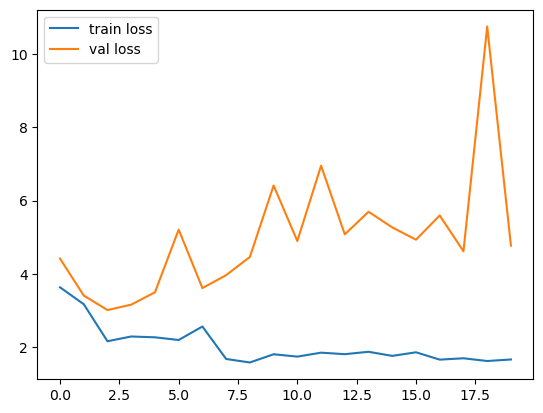

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


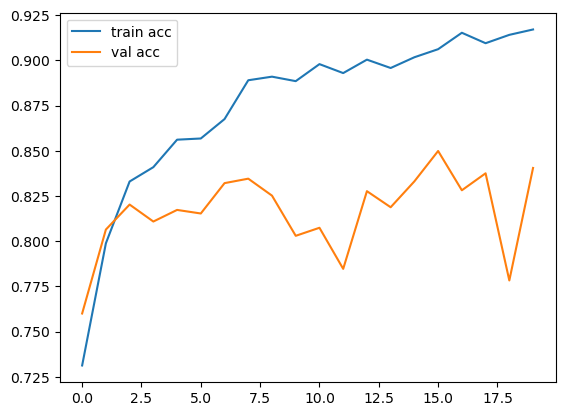

<Figure size 640x480 with 0 Axes>

In [11]:

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = model.predict_generator(test_set, test_set.samples //
32+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

/var/folders/1r/d9gtx_q511v7f19mk0_z468r0000gn/T/ipykernel_49340/2919555015.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, test_set.samples //
2023-07-02 01:34:24.302813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Confusion Matrix
[[ 72  92  88  64  87]
 [ 46  88  74  82 117]
 [ 65  73  87  73 106]
 [ 52  92  83  86  95]
 [ 52  85  87  76 103]]
